In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
d = pd.read_csv("../csv/scraping/wines.csv")

In [6]:
len(d)

98288

In [3]:
# 폰트 설정

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font)

In [4]:
df_wine = pd.read_csv("./scraping/csv/wines.csv")

## wines

### 탐색(조회)

In [10]:
print("wines shape: ", df_wine.shape)

wines shape:  (42775, 12)


In [5]:
df_wine.head(5)

,winery,year,id,name,title,acidity,intensity,sweetness,tannin,price,type_id,country
0,Entrada,2021,1151230,Malbec,Entrada Malbec 2021,2.561932,4.020000,1.696932,2.221363,8.99,1,Argentina
1,Santa Julia,2021,1194993,Cabernet Sauvignon,Santa Julia Cabernet Sauvignon 2021,3.099404,3.758206,1.675100,3.585878,8.99,1,Argentina
2,Alamos,2019,1387085,Cabernet Sauvignon,Alamos Cabernet Sauvignon 2019,3.076093,3.873418,1.688120,3.447126,9.98,1,Argentina
3,Alamos,2020,1225291,Red Blend,Alamos Red Blend 2020,3.458403,3.954693,2.462002,2.921730,9.98,1,Argentina
4,Santa Julia,2021,1579874,Orgánica Cabernet Sauvignon,Santa Julia Orgánica Cabernet Sauvignon 2021,3.146355,3.810204,1.465036,3.333861,9.99,1,Argentina


In [8]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42775 entries, 0 to 42774
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   winery     42764 non-null  object 
 1   year       42711 non-null  object 
 2   id         42775 non-null  int64  
 3   name       42775 non-null  object 
 4   title      42775 non-null  object 
 5   acidity    42775 non-null  float64
 6   intensity  42775 non-null  float64
 7   sweetness  39049 non-null  float64
 8   tannin     20094 non-null  float64
 9   price      42775 non-null  float64
 10  type_id    42775 non-null  int64  
 11  country    42775 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 3.9+ MB


### 결측치 처리(행 제거)

<Axes: >

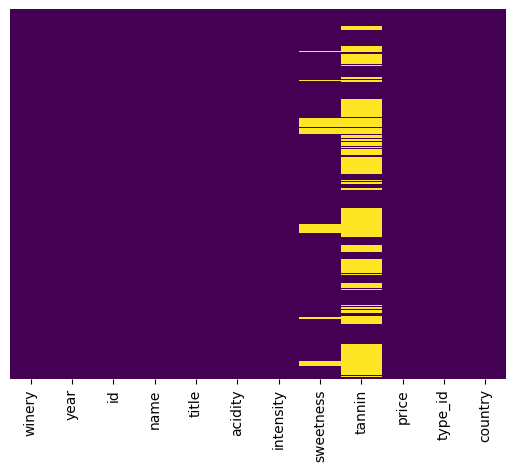

In [421]:
sns.heatmap(df_wine.isnull(), yticklabels=False, cbar=False, cmap="viridis")

<Axes: >

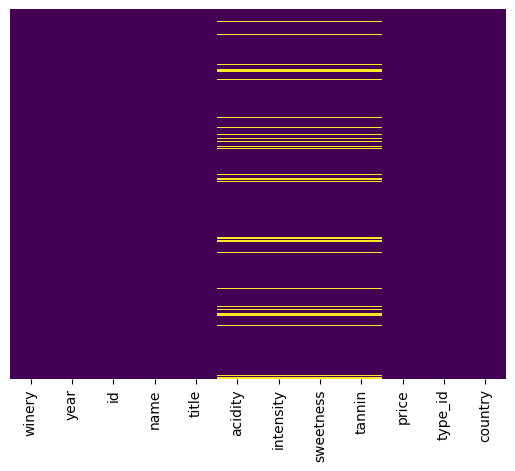

In [422]:
sns.heatmap(df_wine==-1, yticklabels=False, cbar=False, cmap="viridis")

#### winery

In [423]:
df_wine.loc[df_wine["winery"].isna(), :]

,winery,year,id,name,title,acidity,intensity,sweetness,tannin,price,type_id,country
537,NaN,2021,4205688,Ataliva Malbec Mendoza,Ataliva Malbec Mendoza 2021,2.715000,4.000000,2.184500,2.223500,9.980000,1,Argentina
6004,NaN,2021,1319481,Domaine Wachau Grüner Veltliner,Domaine Wachau Grüner Veltliner 2021,4.075145,2.063402,1.122614,NaN,24.990000,2,Austria
13121,NaN,2007,2034144,Le Mesnil Champagne Prestige Brut Blanc De Bla...,Le Mesnil Champagne Prestige Brut Blanc De Bla...,4.952809,4.433708,NaN,NaN,183.333333,3,France
17359,NaN,2020,735605,Riesling,Riesling 2020,4.592059,3.140785,1.403529,NaN,30.000000,2,Germany
18195,NaN,2019,735605,Riesling,Riesling 2019,4.592059,3.140785,1.403529,NaN,33.000000,2,Germany
18593,NaN,2018,1426884,Dr. Von Bassermann-Jordan Pfalz Pechstein,Dr. Von Bassermann-Jordan Pfalz Pechstein 2018,4.458302,3.354906,2.002453,NaN,145.000000,2,Germany
26602,NaN,2019,2213332,Cosmopolitan Diva,Cosmopolitan Diva 2019,-1.000000,-1.000000,-1.000000,-1.000000,45.000000,1,Latvia
33459,NaN,2018,3078103,El Pajaro Rojo,El Pajaro Rojo 2018,3.456726,3.306195,1.658761,3.122301,18.990000,1,Spain
40890,NaN,2016,5887235,Delaware,Delaware 2016,-1.000000,-1.000000,-1.000000,-1.000000,38.000000,3,United States
41155,NaN,2017,5887235,Delaware,Delaware 2017,-1.000000,-1.000000,-1.000000,-1.000000,28.000000,3,United States


In [5]:
df_wine = df_wine.loc[df_wine["winery"].isna()==False, :]

#### year

In [231]:
df_wine.loc[df_wine["year"].isna(), :]

,winery,year,id,name,title,acidity,intensity,sweetness,tannin,price,type_id,country
2316,Malma - NQN,NaN,1525145,Extra Brut Cuvée Reserve,Malma - NQN Extra Brut Cuvée Reserve,-1.000000,-1.000000,-1.000000,-1.0,9.99,3,Argentina
2317,Zuccardi,NaN,1225687,Cuvée Especial Blanc De Blancs,Zuccardi Cuvée Especial Blanc De Blancs,4.248306,2.399381,NaN,NaN,39.99,3,Argentina
2374,Zuccardi,NaN,19488,Malamado Malbec Port,Zuccardi Malamado Malbec Port,-1.000000,-1.000000,-1.000000,-1.0,24.95,24,Argentina
4297,Kings of Prohibition,NaN,8578764,Chardonnay,Kings of Prohibition Chardonnay,2.897392,3.311884,2.038696,NaN,17.99,2,Australia
4917,Lindeman's,NaN,1286568,Bin 30 Sparkling Rosé,Lindeman's Bin 30 Sparkling Rosé,4.174702,3.036776,4.356530,NaN,7.99,3,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...
40764,Blanc de Bleu,NaN,1420159,Cuvée Mousseux Brut,Blanc de Bleu Cuvée Mousseux Brut,3.064289,3.850717,NaN,NaN,19.99,3,United States
40768,Gruet,NaN,1707452,Blanc de Blancs,Gruet Blanc de Blancs,4.319825,2.114722,NaN,NaN,20.99,3,United States
41092,Korbel,NaN,1143755,Pinot Noir - Chardonnay Natural,Korbel Pinot Noir - Chardonnay Natural,3.315831,3.704859,NaN,NaN,14.99,3,United States
41245,Gloria Ferrer,NaN,1129858,Blanc de Blancs Brut,Gloria Ferrer Blanc de Blancs Brut,3.385122,3.734474,NaN,NaN,18.98,3,United States


In [393]:
df_wine.loc[df_wine["year"].isna(), "title"].to_list()

['Malma - NQN Extra Brut Cuvée Reserve',
 'Zuccardi Cuvée Especial Blanc De Blancs',
 'Zuccardi Malamado Malbec Port',
 'Kings of Prohibition Chardonnay',
 "Lindeman's Bin 30 Sparkling Rosé",
 'Weingut Bründlmayer Brut Reserve',
 'Weingut Bründlmayer Extra Brut Reserve',
 'Cave Amadeu Rosé Brut',
 'House Wine Co. White House Wine Co. Vidal - Moscato',
 "Marc Kreydenweiss Crémant d'Alsace",
 "Chapuy L'Esprit de Chapuy Blanc de Blancs Brut Champagne Grand Cru",
 'Canard-Duchêne Authentic Brut Champagne',
 'Louis de Grenelle Chevalier de Grenelle Cuvée Réservée Saumur',
 'Thienot Brut Champagne',
 'Le Mesnil Blanc de Blancs Brut Champagne Grand Cru N.V',
 'Nicolas Feuillatte Brut Rosé Champagne',
 'Deutz Rosé Brut Champagne',
 'Palmer & Co. Blanc de Blancs Champagne',
 "Arthur Metz Réserve de l'Abbaye Crémant d'Alsace Blanc de Noirs",
 'Leclerc Briant La Croisette Champagne',
 'Gratien & Meyer Crémant de Loire Brut',
 'Leclerc Briant Extra Brut Champagne Premier Cru',
 'Ployez-Jacquemart 

In [6]:
df_wine = df_wine.loc[df_wine["year"].isna()==False, :]

### 결측치 처리(열 제거)

#### sweetness

In [236]:
df_wine.loc[df_wine["sweetness"].isna(), :]

,winery,year,id,name,title,acidity,intensity,sweetness,tannin,price,type_id,country
2298,Santa Julia,N.V.,4234526,Blanc de Blancs,Santa Julia Blanc de Blancs,4.552982,2.237485,NaN,NaN,11.990000,3,Argentina
2299,Santa Julia,N.V.,1150898,Brut Rosé,Santa Julia Brut Rosé,4.546587,1.962730,NaN,NaN,11.990000,3,Argentina
2300,Pascual Toso,N.V.,1172743,Brut,Pascual Toso Brut,4.538186,2.038186,NaN,NaN,12.000000,3,Argentina
2301,Antucura,N.V.,2835032,Chérie Sparkling Pinot Noir Rosé,Antucura Chérie Sparkling Pinot Noir Rosé,4.187365,2.363333,NaN,NaN,18.040833,3,Argentina
2302,CHANDON Argentina,N.V.,9618321,Garden Spritz,CHANDON Argentina Garden Spritz,4.450949,2.068670,NaN,NaN,21.990000,3,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...
41264,Piper Sonoma,N.V.,1641435,Brut Rosé,Piper Sonoma Brut Rosé,3.143533,3.368769,NaN,NaN,16.990000,3,United States
41265,La Crema,N.V.,6012619,Brut Rosé,La Crema Brut Rosé,3.243794,3.852990,NaN,NaN,38.990000,3,United States
41267,Broc Cellars,2021,9506451,Love Sparkling Chenin Blanc,Broc Cellars Love Sparkling Chenin Blanc 2021,3.436554,3.770000,NaN,NaN,33.990000,3,United States
41268,Maysara,N.V.,2466150,Pinot Noir Sparkling Rosé,Maysara Pinot Noir Sparkling Rosé,4.517938,4.000000,NaN,NaN,26.990000,3,United States


In [7]:
df_wine.drop(["sweetness"], axis=1, inplace=True)

#### tannin

In [238]:
df_wine.loc[df_wine["tannin"].isna(), :]

,winery,year,id,name,title,acidity,intensity,tannin,price,type_id,country
1925,Entrada,2021,4746459,Chardonnay,Entrada Chardonnay 2021,2.565192,3.500000,NaN,8.99,2,Argentina
1926,Santa Julia,2022,19480,Viognier,Santa Julia Viognier 2022,2.223859,3.434563,NaN,8.99,2,Argentina
1927,Santa Julia,2022,1275327,Torrontés,Santa Julia Torrontés 2022,3.616251,3.430174,NaN,9.16,2,Argentina
1928,Terrazas de los Andes,2017,1264703,Altos del Plata - Chardonnay,Terrazas de los Andes Altos del Plata - Chardo...,3.100427,3.430837,NaN,9.98,2,Argentina
1929,Santa Julia,2021,19466,Orgánica Chardonnay,Santa Julia Orgánica Chardonnay 2021,3.022071,3.422111,NaN,9.99,2,Argentina
...,...,...,...,...,...,...,...,...,...,...,...
42613,Honig,2019,1965773,Sauvignon Blanc Late Harvest,Honig Sauvignon Blanc Late Harvest 2019,4.270881,3.913284,NaN,69.99,7,United States
42614,Salt Of The Earth,2021,1579571,Flore de Moscato,Salt Of The Earth Flore de Moscato 2021,4.514510,4.000000,NaN,13.99,7,United States
42616,Barefoot,N.V.,8636287,Fruitscato Watermelon,Barefoot Fruitscato Watermelon,4.508039,3.975882,NaN,4.99,7,United States
42619,Sutter Home,N.V.,8555111,Moscato Sangria,Sutter Home Moscato Sangria,4.361667,3.875000,NaN,5.99,7,United States


In [8]:
df_wine.drop(["tannin"], axis=1, inplace=True)

#### 결측치 처리(값 대치)

#### acidity, intensity

In [241]:
df_wine.loc[df_wine["acidity"]==-1, :]

,winery,year,id,name,title,acidity,intensity,price,type_id,country
145,Chakana,2020,6936046,Sobrenatural Tinto,Chakana Sobrenatural Tinto 2020,-1.0,-1.0,16.99,1,Argentina
155,Bodini,2019,5545098,Cielo Rojo Red Blend,Bodini Cielo Rojo Red Blend 2019,-1.0,-1.0,16.99,1,Argentina
218,Capítulo 7,2019,6140763,Belinda,Capítulo 7 Belinda 2019,-1.0,-1.0,19.99,1,Argentina
219,Baron Edmond de Rothschild,2019,6634882,Clos 1100 Tinto,Baron Edmond de Rothschild Clos 1100 Tinto 2019,-1.0,-1.0,19.99,1,Argentina
273,Ver Sacrum,2020,4018332,Garnacha,Ver Sacrum Garnacha 2020,-1.0,-1.0,21.99,1,Argentina
...,...,...,...,...,...,...,...,...,...,...
42770,Artesana,2021,4657491,Tannat Rosé,Artesana Tannat Rosé 2021,-1.0,-1.0,21.99,4,Uruguay
42771,Bodega Garzón,2022,5852589,Reserva Pinot Noir Rosé,Bodega Garzón Reserva Pinot Noir Rosé 2022,-1.0,-1.0,14.95,4,Uruguay
42772,Bodega Garzón,2022,2135687,Estate Pinot Rosé de Corte (Varietales),Bodega Garzón Estate Pinot Rosé de Corte (Vari...,-1.0,-1.0,15.99,4,Uruguay
42773,Bodega Pablo Fallabrino,2000,1178849,Alcyone,Bodega Pablo Fallabrino Alcyone 2000,-1.0,-1.0,27.99,7,Uruguay


In [242]:
df_wine.loc[df_wine["intensity"]==-1, :]

,winery,year,id,name,title,acidity,intensity,price,type_id,country
145,Chakana,2020,6936046,Sobrenatural Tinto,Chakana Sobrenatural Tinto 2020,-1.0,-1.0,16.99,1,Argentina
155,Bodini,2019,5545098,Cielo Rojo Red Blend,Bodini Cielo Rojo Red Blend 2019,-1.0,-1.0,16.99,1,Argentina
218,Capítulo 7,2019,6140763,Belinda,Capítulo 7 Belinda 2019,-1.0,-1.0,19.99,1,Argentina
219,Baron Edmond de Rothschild,2019,6634882,Clos 1100 Tinto,Baron Edmond de Rothschild Clos 1100 Tinto 2019,-1.0,-1.0,19.99,1,Argentina
273,Ver Sacrum,2020,4018332,Garnacha,Ver Sacrum Garnacha 2020,-1.0,-1.0,21.99,1,Argentina
...,...,...,...,...,...,...,...,...,...,...
42770,Artesana,2021,4657491,Tannat Rosé,Artesana Tannat Rosé 2021,-1.0,-1.0,21.99,4,Uruguay
42771,Bodega Garzón,2022,5852589,Reserva Pinot Noir Rosé,Bodega Garzón Reserva Pinot Noir Rosé 2022,-1.0,-1.0,14.95,4,Uruguay
42772,Bodega Garzón,2022,2135687,Estate Pinot Rosé de Corte (Varietales),Bodega Garzón Estate Pinot Rosé de Corte (Vari...,-1.0,-1.0,15.99,4,Uruguay
42773,Bodega Pablo Fallabrino,2000,1178849,Alcyone,Bodega Pablo Fallabrino Alcyone 2000,-1.0,-1.0,27.99,7,Uruguay


In [9]:
mean_by_country_and_type = df_wine.loc[(df_wine["acidity"]!=-1)&(df_wine["intensity"]!=-1), ["acidity", "intensity", "country", "type_id"]].groupby(["country", "type_id"]).mean()
mean_by_type = df_wine.loc[(df_wine["acidity"]!=-1)&(df_wine["intensity"]!=-1), ["acidity", "intensity", "type_id"]].groupby("type_id").mean()

In [10]:
for i, r in df_wine.loc[(df_wine["acidity"]==-1)&(df_wine["intensity"]==-1), ["acidity", "intensity", "country", "type_id"]].iterrows():
    try:
        if mean_by_country_and_type.loc[(r.country, r.type_id)].any():
            df_wine.loc[i, "acidity"] = mean_by_country_and_type.loc[(r.country, r.type_id), "acidity"]
            df_wine.loc[i, "intensity"] = mean_by_country_and_type.loc[(r.country, r.type_id), "intensity"]
    except Exception as e:
        df_wine.loc[i, "acidity"] = mean_by_type.loc[(r.type_id), "acidity"]
        df_wine.loc[i, "intensity"] = mean_by_type.loc[(r.type_id), "intensity"]

### 열 추가(code) id+year

#### year 형변환 -> int

In [81]:
df_wine.year.value_counts().index

Index(['2020', '2021', '2019', '2018', '2017', 'N.V.', '2022', '2016', '2015',
       '2014', '2013', '2012', '2011', '2010', '2009', '2007', '2008', '2005',
       '2006', '2003', '2004', '2002', '2000', '2001', '1997', '1999', '1995',
       '1996', '1998', '1994', '1983', '1989', '1985', '1988', '1990', '1975',
       '1970', '1986', '1991', '1977', '1980', '1978', '1967', '1966', '1976',
       '1992', '1979', '1982', '1971', '1963', '1993', '1981', '1987', '1961',
       '1968', '1965', '1960', '1955', '1959', '1969', '1964', '1974', '1947',
       '1984', '1944', '1962', '1973', '1931', '1940', '1972', '1953', '1958',
       '1957', '1946', '1927', '1934', '1952', '1945', '1950', '2023', '1939',
       '1929', '1954', '1951', '1948', '1949', '1928', '1938', '1935', '1941',
       '1956', '1925', '1907', '1912', '1847'],
      dtype='object', name='year')

In [11]:
df_wine.loc[df_wine["year"]=="N.V.", "year"]="9999"

In [12]:
df_wine.loc[df_wine["year"]=="9999", "year"]

26       9999
386      9999
401      9999
769      9999
771      9999
         ... 
42656    9999
42670    9999
42671    9999
42687    9999
42689    9999
Name: year, Length: 2535, dtype: object

In [13]:
df_wine = df_wine.astype({"year":"int64"})

In [14]:
df_wine["code"] = df_wine.loc[:, "id"].astype("str") + df_wine.loc[:, "year"].astype("str")

In [15]:
df_wine = df_wine[["code", "id", "title", "name", "winery", "year", "type_id", "country", "acidity", "intensity", "price"]]

In [16]:
df_wine.reset_index(drop=True, inplace=True)

In [17]:
df_wine

,code,id,title,name,winery,year,type_id,country,acidity,intensity,price
0,11512302021,1151230,Entrada Malbec 2021,Malbec,Entrada,2021,1,Argentina,2.561932,4.020000,8.99
1,11949932021,1194993,Santa Julia Cabernet Sauvignon 2021,Cabernet Sauvignon,Santa Julia,2021,1,Argentina,3.099404,3.758206,8.99
2,13870852019,1387085,Alamos Cabernet Sauvignon 2019,Cabernet Sauvignon,Alamos,2019,1,Argentina,3.076093,3.873418,9.98
3,12252912020,1225291,Alamos Red Blend 2020,Red Blend,Alamos,2020,1,Argentina,3.458403,3.954693,9.98
4,15798742021,1579874,Santa Julia Orgánica Cabernet Sauvignon 2021,Orgánica Cabernet Sauvignon,Santa Julia,2021,1,Argentina,3.146355,3.810204,9.99
...,...,...,...,...,...,...,...,...,...,...,...
42695,46574912021,4657491,Artesana Tannat Rosé 2021,Tannat Rosé,Artesana,2021,4,Uruguay,3.544537,2.792417,21.99
42696,58525892022,5852589,Bodega Garzón Reserva Pinot Noir Rosé 2022,Reserva Pinot Noir Rosé,Bodega Garzón,2022,4,Uruguay,3.544537,2.792417,14.95
42697,21356872022,2135687,Bodega Garzón Estate Pinot Rosé de Corte (Vari...,Estate Pinot Rosé de Corte (Varietales),Bodega Garzón,2022,4,Uruguay,3.544537,2.792417,15.99
42698,11788492000,1178849,Bodega Pablo Fallabrino Alcyone 2000,Alcyone,Bodega Pablo Fallabrino,2000,7,Uruguay,4.365325,4.258720,27.99


### EDA

In [18]:
sns.set_context("talk")

Text(0.5, 1.0, '국가별 생산 와인 Top 20')

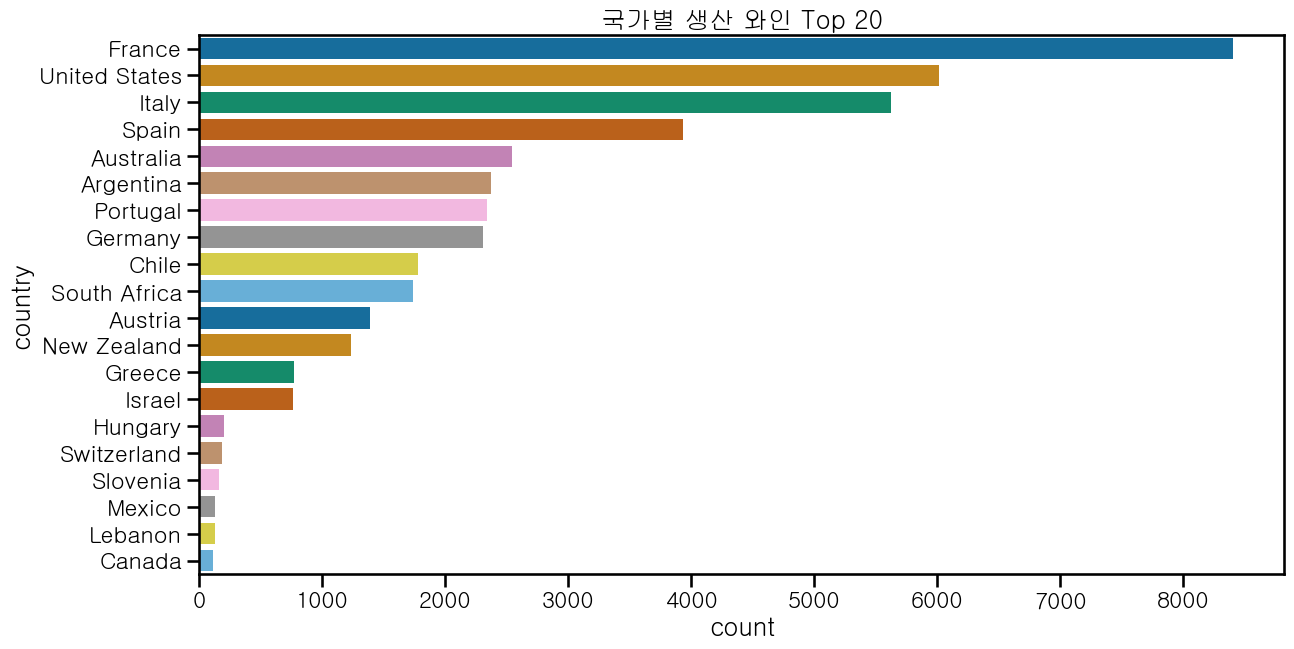

In [19]:
plt.figure(figsize=(14, 7))
cnt_by_country = df_wine["country"].value_counts().to_frame()[:20]
sns.barplot(x=cnt_by_country["count"], y=cnt_by_country.index, data=cnt_by_country, palette="colorblind", orient="h")
plt.title("국가별 생산 와인 Top 20", pad=5)

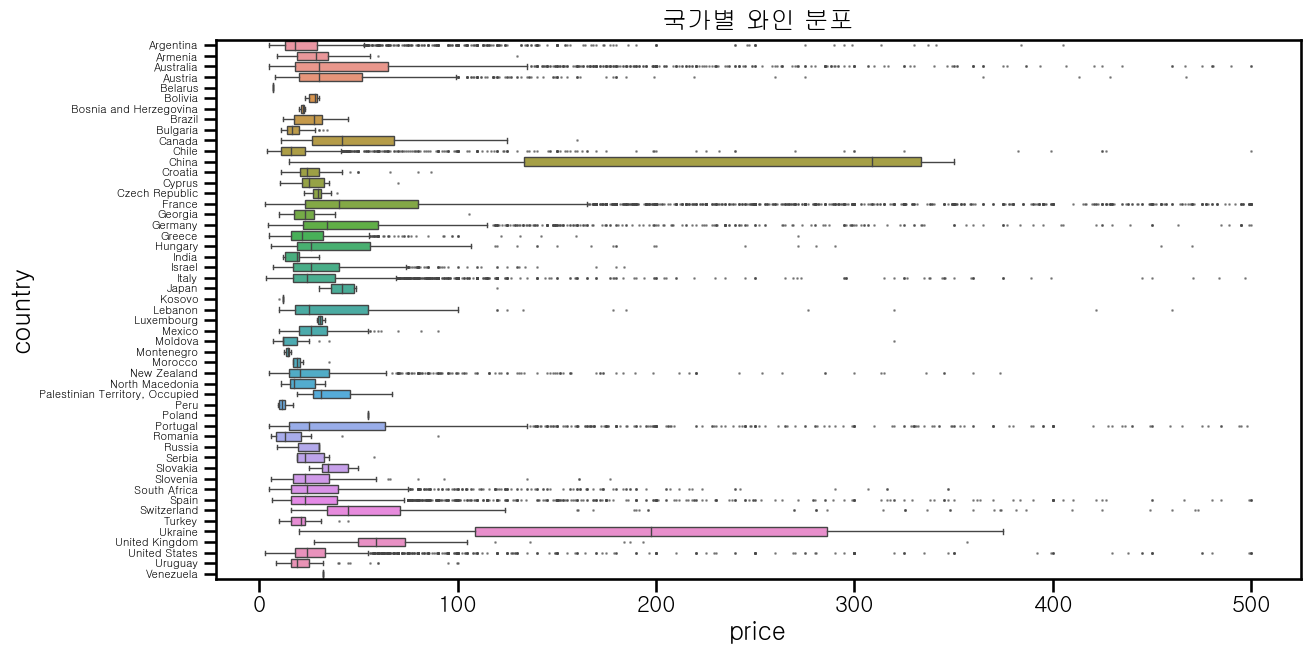

In [70]:
plt.figure(figsize=(14, 7))
g = sns.boxplot(data=df_wine, y="country", x="price", linewidth=1, flierprops={"marker":"o", "alpha":0.5, "markersize":1})
g.set_yticklabels(labels=g.get_yticklabels(), size=8)
plt.title("국가별 와인 분포", pad=8)
plt.show()

In [71]:
plt.figure(figsize=(14, 7))
table = df_wine[["price", "country"]].groupby(["country"])["price"].max().sort_values(ascending=False)[:20]

<Figure size 1400x700 with 0 Axes>

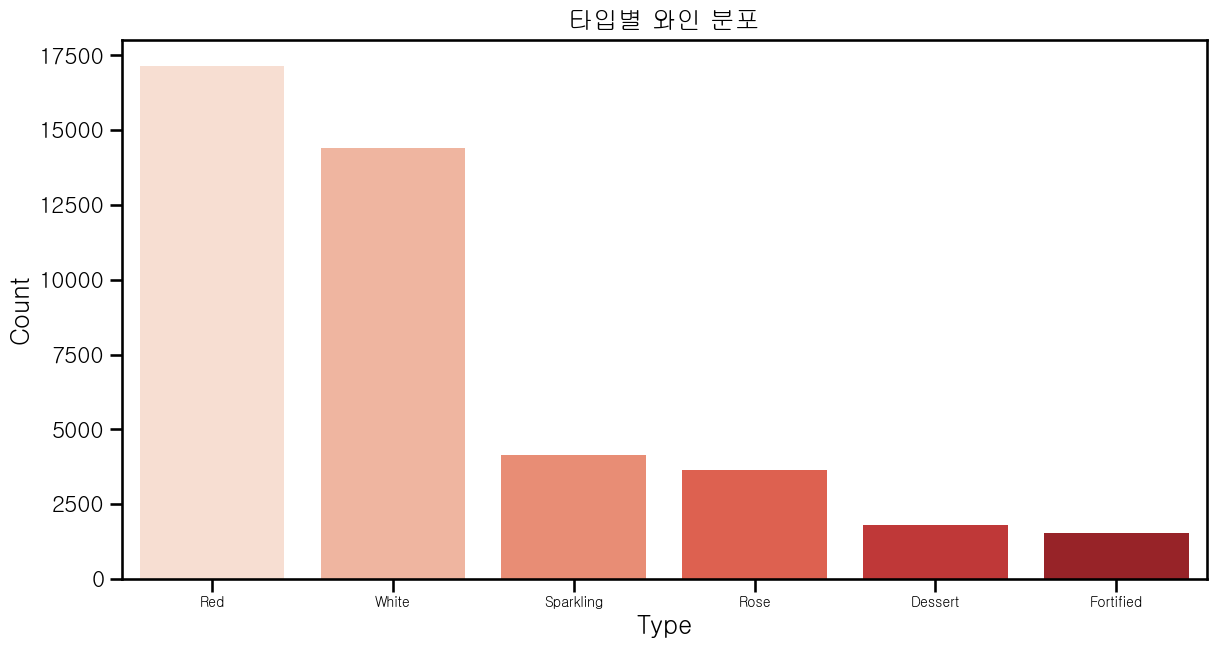

In [117]:
plt.figure(figsize=(14, 7))
table = df_wine["type_id"].value_counts().to_frame()
g = sns.barplot(data=table, x=table.index, y="count", palette="Reds")
g.set_xticklabels(labels=["Red", "White", "Sparkling", "Rose", "Dessert", "Fortified"], size=10)
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("타입별 와인 분포", pad=8)
plt.show()

## reviews

### info

In [119]:
df_review = pd.read_csv("./scraping/csv/reviews.csv")

C:\Users\peep1\AppData\Local\Temp\ipykernel_11792\1866882116.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review = pd.read_csv("./scraping/csv/reviews.csv")


In [121]:
df_review.head()

,id,year,wine_id,user_rating,user_id
0,78046067,2016,1151230,3.0,1540719
1,30464508,2014,1151230,4.0,5594279
2,220757899,2020,1151230,3.5,9555757
3,81388132,2016,1151230,3.0,4367459
4,111727789,2018,1151230,1.0,25169642


In [122]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19263818 entries, 0 to 19263817
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   year         object 
 2   wine_id      int64  
 3   user_rating  float64
 4   user_id      int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 734.9+ MB


In [123]:
for c in df_review.columns:
    print(df_review[[c]].isna().value_counts())

id   
False    19263818
Name: count, dtype: int64
year 
False    18058681
True      1205137
Name: count, dtype: int64
wine_id
False      19263818
Name: count, dtype: int64
user_rating
False          19263818
Name: count, dtype: int64
user_id
False      19263818
Name: count, dtype: int64


### 결측치 처리(행 제거)

#### year

In [124]:
df_review.loc[df_review["year"].isna(), :]

,id,year,wine_id,user_rating,user_id
7,58275519,NaN,1151230,4.0,5130532
22,73898194,NaN,1151230,3.0,14158479
64,21754145,NaN,1151230,4.0,7739336
87,276826993,NaN,1194993,3.5,49979584
92,68451232,NaN,1194993,3.5,11155067
...,...,...,...,...,...
19263779,199947297,NaN,5852589,5.0,34194282
19263780,225646564,NaN,5852589,5.0,50414462
19263783,235564301,NaN,5852589,5.0,17925293
19263784,179911373,NaN,5852589,5.0,36375607


In [125]:
df_review = df_review.loc[df_review["year"].isna()==False, :]

### 열 추가

In [126]:
df_review.loc[df_review["year"]=="N.V.", "year"] = "9999"

In [127]:
df_review.loc[df_review["year"]=="9999", "year"]

100353      9999
100354      9999
100355      9999
100356      9999
100358      9999
            ... 
19207031    9999
19207032    9999
19207033    9999
19207034    9999
19207035    9999
Name: year, Length: 1255164, dtype: object

In [128]:
df_review.loc[:, "year"] = df_review.loc[:, "year"].astype("float").astype("int64")

In [129]:
df_review["code"] = df_review.loc[:, "wine_id"].astype("str") + df_review.loc[:, "year"].astype("str")

C:\Users\peep1\AppData\Local\Temp\ipykernel_11792\1354927064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["code"] = df_review.loc[:, "wine_id"].astype("str") + df_review.loc[:, "year"].astype("str")


### 열 제거

In [130]:
df_review = df_review[["code", "wine_id", "year", "user_id", "user_rating"]]

### 통합

In [134]:
print("review_wine_code_unique: ", len(df_review.code.unique()))
print("wine_wine_code_unique: ", len(df_wine.code.unique()))

review_wine_code_unique:  356299
wine_wine_code_unique:  42700


In [150]:
df_wine2 = df_review.loc[df_review["code"].isin(df_wine.code)==False, ["wine_id", "year", "code"]].drop_duplicates(["code"])[["wine_id", "year"]]
df_wine2.to_csv("./scraping/csv/wines2.csv", index=False)

In [142]:
df_wine.loc[df_wine["id"]==11512302016, :]

,code,id,title,name,winery,year,type_id,country,acidity,intensity,price


In [158]:
df_review["code"].value_counts().mean()

50.684063104302844

In [159]:
df_review["code"].value_counts().median()

8.0

### 최소 리뷰 필터 조정

In [209]:
for v in range(50, 101, 5):
    review_cnt = df_review["code"].value_counts()
    review_cnt_idx = review_cnt[review_cnt.values>=v].index
    reviews = df_review[df_review["code"].isin(review_cnt_idx)]
    
    print(f"min_review_count: {v}, review_wine_count: {len(reviews['code'].unique())}, final_wine_count: {len(reviews.loc[reviews['code'].isin(df_wine['code'].unique()), 'code'].unique())}")

min_review_count: 50, review_wine_count: 68597, final_wine_count: 13020
min_review_count: 55, review_wine_count: 63846, final_wine_count: 12266
min_review_count: 60, review_wine_count: 59649, final_wine_count: 11580
min_review_count: 65, review_wine_count: 56051, final_wine_count: 11020
min_review_count: 70, review_wine_count: 52815, final_wine_count: 10482
min_review_count: 75, review_wine_count: 49749, final_wine_count: 9981
min_review_count: 80, review_wine_count: 47090, final_wine_count: 9526
min_review_count: 85, review_wine_count: 44674, final_wine_count: 9112
min_review_count: 90, review_wine_count: 42419, final_wine_count: 8708
min_review_count: 95, review_wine_count: 40386, final_wine_count: 8339
min_review_count: 100, review_wine_count: 38511, final_wine_count: 8012


### 50개 이상인 와인 중 df_wine에 누락된 와인들 재 수집(scraping.ipynb)

In [210]:
min_review_count = 50
review_cnt = df_review["code"].value_counts()
review_cnt_idx = review_cnt[review_cnt.values>=min_review_count].index
reviews = df_review[df_review["code"].isin(review_cnt_idx)]

In [218]:
reviews.loc[reviews["code"].isin(df_wine["code"].unique())==False, :].drop_duplicates("code")[["wine_id", "year"]].to_csv("./scraping/csv/wines2.csv", index=False)

In [230]:
import pandas as pd
import requests
import json

df_wine2 = pd.read_csv("./scraping/csv/wines2.csv")
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
               "referer":"https://www.vivino.com/explore?e=eJzLLbI1VMvNzLM1UMtNrLA1NTBQS660DQ1WSwYSLmoFQNn0NNuyxKLM1JLEHLX8ohTblNTiZLX8pErbgqLM5FS18pLoWKAqMGUEoUwglDmEMobKmQBNLgYyEovUim2dHQF9pSex"}

In [226]:
result = []

for i, v in df_wine2.iterrows():
    r = requests.get(f"https://www.vivino.com/US-CA/en/w/{v['wine_id']}?year={v['year']}", headers=headers)
    json_body = r.text.splitlines()
    for i, v in enumerate(json_body):
        if v.startswith("  window.__PRELOADED_STATE__.vintagePageInformation = "):
            data = json.loads(json_body[i].split(" = ")[1][:-1])["wine"]
            

wine_id    5852589
year          2021
Name: 55576, dtype: int64

In [247]:
v

'</html>'

In [248]:
r = requests.get(f"https://www.vivino.com/US-CA/en/w/6401250?year=2016", headers=headers)

In [249]:
json_body = r.text.splitlines()
for i, v in enumerate(json_body):
    if v.startswith("  window.__PRELOADED_STATE__.vintagePageInformation = "):
        data = json.loads(json_body[i].split(" = ")[1][:-1])

In [274]:
data["wine"]["region"]["country"]["name"]

'Spain'